# Part I. Root-finding. Newton's iteration.

In [63]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use(['classic'])
sns.set(style="darkgrid")

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [17]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    i = -1
    while True:
        i += 1
        der = fder(x)
        step = f(x) / fder(x)
        if ((abs(step) <= abs(eps * x)) or (i > maxiter)):
            return (x, i)
        else:
            x -= step 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [22]:
def f(x):
    return x ** 2 - 1
def fder(x):
    return 2 * x

#true_result = 1
newton_iteration(f, fder, -10)

(-1.0000052895642693, 6)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [23]:
def mod_newton(f, fder, x0, m=1, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    m : integer
        Integer constant for modification of Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    i = -1
    while True:
        i += 1
        der = fder(x)
        step = f(x) / fder(x)
        if ((abs(step) <= abs(eps * x)) or (i > maxiter)):
            return (x, i)
        else:
            x -= m * step 

In [62]:
def f_2(x):
    return (x ** 2 - 1) ** 2
def fder_2(x):
    return (2 * (x ** 2 - 1) * 2 * x)
for i in range(1, 4):
    for j in np.arange(-5 + 1e-5, 5):
        print('Начальное условие x_0 = {}, m = {}'.format(j, i))
        print('Корень: {}, число итераций {}\n'.format(mod_newton(f_2, fder_2, j, i)[0],mod_newton(f_2, fder_2, j, i)[1]))

Начальное условие x_0 = -4.99999, m = 1
Корень: -1.0000114752884501, число итераций 21

Начальное условие x_0 = -3.9999900000000004, m = 1
Корень: -1.0000130819391237, число итераций 20

Начальное условие x_0 = -2.9999900000000004, m = 1
Корень: -1.0000123834638333, число итераций 19

Начальное условие x_0 = -1.9999900000000004, m = 1
Корень: -1.000015658949842, число итераций 17

Начальное условие x_0 = -0.9999900000000004, m = 1
Корень: -0.9999900000000004, число итераций 0

Начальное условие x_0 = 9.999999999621423e-06, m = 1
Корень: 1.0000182207724804, число итераций 51

Начальное условие x_0 = 1.0000099999999996, m = 1
Корень: 1.0000099999999996, число итераций 0

Начальное условие x_0 = 2.0000099999999996, m = 1
Корень: 1.0000156594342688, число итераций 17

Начальное условие x_0 = 3.0000099999999996, m = 1
Корень: 1.000012383684002, число итераций 19

Начальное условие x_0 = 4.00001, m = 1
Корень: 1.000013082105715, число итераций 20

Начальное условие x_0 = -4.99999, m = 2
Коре

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [67]:
def left_f(x):
    return np.sqrt(x)

def right_f(x):
    return (np.cos(x))

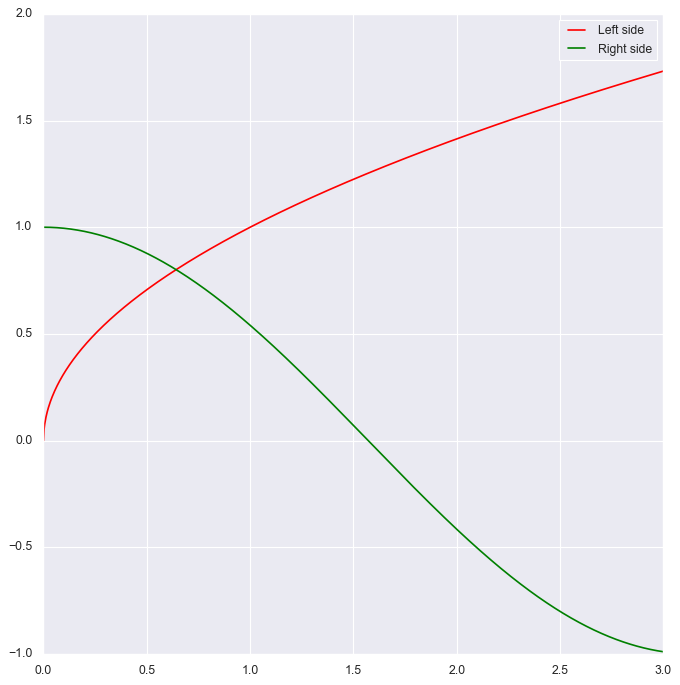

In [80]:
plt.figure(figsize = (10, 10))
x = np.linspace(0, 3, 10**3)
plt.plot(x, left_f(x), '-', color='red', label='Left side')
plt.plot(x, right_f(x), '-', color='green', label='Right side')
plt.legend()
plt.show()

In [88]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    x = x0
    i = -1
    while True:
        i += 1
        if (abs(x - f(x)) <= eps):
            return x
        else:
            x = f(x)

In [90]:
def function(x):
    return np.cos(x) ** 2
fixed_point(function, 0)

0.6417194456539416

In [103]:
# Говно
def fixed_point_enh(f, x0, a, eps=1e-5, maxiter=1000):
    x = x0
    i = -1
    while True:
        i += 1
        if (abs(f(x)) <= eps):
            return x
        else:
            x += a * f(x)

In [107]:
def function(x):
    return np.cos(x) ** 2
fixed_point_enh(function, 2, 5)

26.70040188824629

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the $\textit{basins of attraction}$ of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.